作業1

# 建立同樣結構的⼩小樣本驗證程式碼

## 建立方法

### 方法一

In [26]:
data = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitor': [139, 237, 326, 456]}

In [27]:
visitors_1 = pd.DataFrame(data)
print(visitors_1)

  weekday    city  visitor
0     Sun  Austin      139
1     Sun  Dallas      237
2     Mon  Austin      326
3     Mon  Dallas      456


### 方法二

In [28]:
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
visitors = [139, 237, 326, 456]

list_labels = ['city', 'weekday', 'visitor']
list_cols = [cities, weekdays, visitors]

zipped = list(zip(list_labels, list_cols))

In [29]:
visitors_2 = pd.DataFrame(dict(zipped))
print(visitors_2)

     city weekday  visitor
0  Austin     Sun      139
1  Dallas     Sun      237
2  Austin     Mon      326
3  Dallas     Mon      456


## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [8]:
# coding='UTF-8'
import pandas as pd
import numpy as np

In [14]:
data = {'國家': ['Taiwan', 'United States', 'Thailand'],
        '人口': [3000000, 50000000, 700000000]}
data = pd.DataFrame(data)

In [21]:
data['國家'][data['人口'].idxmax()]

'Thailand'

---

作業2

# 讀取其他資料格式

## 1. 使用內建功能讀取 txt 檔

In [38]:
with open('../data/example.txt') as f:
    data = f.readlines()
print(data)

['id,sex,age,score\n', '001,F,20,77\n', '002,F,25,90\n', '003,M,22,80\n', '004,F,30,66\n', '005,M,40,60\n', '006,M,29,87']


### 將 txt 轉成 pandas dataframe

In [39]:
import pandas as pd

data = []
with open('../data/example.txt', 'r') as f:
    for line in f:
        line = line.replace('\n', '').split(',') # 將每句最後的 /n 取代成空值後，再以逗號斷句
        data.append(line)
print(data)

[['id', 'sex', 'age', 'score'], ['001', 'F', '20', '77'], ['002', 'F', '25', '90'], ['003', 'M', '22', '80'], ['004', 'F', '30', '66'], ['005', 'M', '40', '60'], ['006', 'M', '29', '87']]


In [40]:
df = pd.DataFrame(data[1:])
df.columns = data[0]
df

,id,sex,age,score
0,001,F,20,77
1,002,F,25,90
2,003,M,22,80
3,004,F,30,66
4,005,M,40,60
5,006,M,29,87


### 將資料轉成 json 檔後輸出
將 json 讀回來後，是否與我們原本想要存入的方式一樣? (以 id 為 key)

In [45]:
import json
df.to_json('../data/example01.json')

In [46]:
# 上面的存入方式，會將 column name 做為主要的 key, row name 做為次要的 key
with open('../data/example01.json', 'r') as f:
    j1 = json.load(f)
j1

{'id': {'0': '001',
  '1': '002',
  '2': '003',
  '3': '004',
  '4': '005',
  '5': '006'},
 'sex': {'0': 'F', '1': 'F', '2': 'M', '3': 'F', '4': 'M', '5': 'M'},
 'age': {'0': '20', '1': '25', '2': '22', '3': '30', '4': '40', '5': '29'},
 'score': {'0': '77', '1': '90', '2': '80', '3': '66', '4': '60', '5': '87'}}

In [47]:
df.set_index('id', inplace=True)
df

,sex,age,score
id,,,
001,F,20,77
002,F,25,90
003,M,22,80
004,F,30,66
005,M,40,60
006,M,29,87


In [56]:
df.to_json('../data/example02.json', orient='index')

In [57]:
with open('../data/example02.json', 'r') as f:
    j2 = json.load(f)
j2

{'001': {'sex': 'F', 'age': '20', 'score': '77'},
 '002': {'sex': 'F', 'age': '25', 'score': '90'},
 '003': {'sex': 'M', 'age': '22', 'score': '80'},
 '004': {'sex': 'F', 'age': '30', 'score': '66'},
 '005': {'sex': 'M', 'age': '40', 'score': '60'},
 '006': {'sex': 'M', 'age': '29', 'score': '87'}}

### 將檔案存為 npy 檔
一個專門儲存 numpy array 的檔案格式
使用 npy 通常可以讓你更快讀取資料喔!  
[建議閱讀](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)

In [58]:
import numpy as np
# 將 data 的數值部份轉成 numpy array
array = np.array(data[1:])
array

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

In [59]:
np.save(arr=array, file='../data/example.npy')

In [60]:
array_back = np.load('../data/example.npy')
array_back

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

## 2. Pickle
存成 pickle 檔  
什麼都包，什麼都不奇怪的 [Pickle](https://docs.python.org/3/library/pickle.html)  
比如說 [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) 的資料集就是用 pickle 包的喔!

In [61]:
import pickle
with open('../data/example.pkl', 'wb') as f:
    pickle.dump(file=f, obj=data)

In [62]:
with open('../data/example.pkl', 'rb') as f:
    pkl_data = pickle.load(f)
pkl_data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

## 3. 讀取圖片 
常見的套件:
1. skimage
2. PIL
3. OpenCV

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

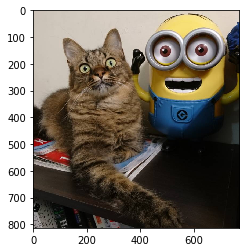

In [26]:
import skimage.io as skio
img1 = skio.imread('../data/example.jpg')
plt.imshow(img1)
plt.show()

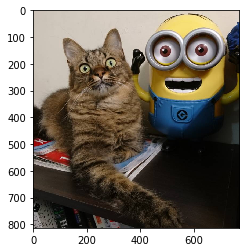

In [27]:
from PIL import Image
img2 = Image.open('../data/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

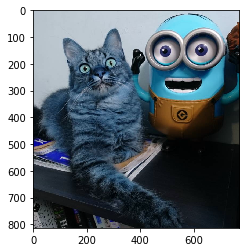

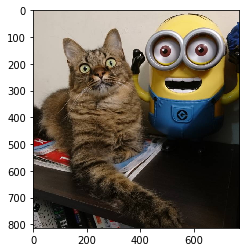

In [28]:
import cv2
img3 = cv2.imread('../data/example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [29]:
N_times = 10

In [30]:
%%timeit
im = np.array([skio.imread('../data/example.jpg') for _ in range(N_times)])

304 ms ± 4.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%%timeit
im = np.array([np.array(Image.open('../data/example.jpg')) for _ in range(N_times)])

350 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('../data/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

115 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 將影像存成 mat

In [34]:
import scipy.io as sio
sio.savemat(file_name='../data/example.mat', mdict={'img':img1})

In [35]:
mat_arr = sio.loadmat('../data/example.mat')
print(mat_arr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'img'])


In [36]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(813, 771, 3)


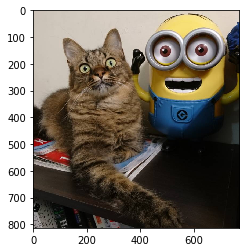

In [37]:
plt.imshow(mat_arr)
plt.show()

# 練習時間

## 1. 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [2]:
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [3]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [4]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 2. 將 txt 轉成 pandas dataframe

In [5]:
import pandas as pd

data = data[:-1]
arrange_data = {'id': [i.split('\t')[0] for i in data], 'pic': [i.split('\t')[1] for i in data]}

df = pd.DataFrame(arrange_data)
df.head()

,id,pic
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 3. 讀取圖片，讀取上面 data frame 中的前 5 張圖片

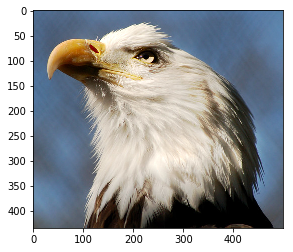

In [10]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

first_link = df.loc[0]['pic']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert image to numpy array
img = np.array(img)

plt.imshow(img)
plt.show()

In [25]:
def img2arr_fromURLs(url_list, resize=False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img_list.append(np.array(img))
        except:
            print('%s is invalid' % url)
    return img_list

http://img100.imageshack.us/img100/3253/forrest004fs9.jpg is invalid
Total images that we got: 4 


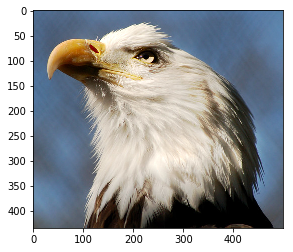

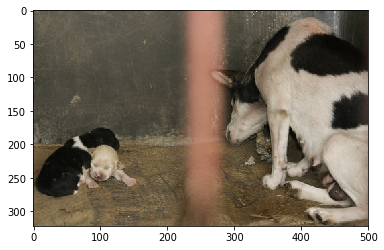

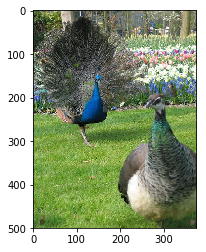

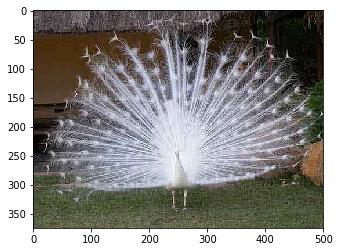

In [26]:
result = img2arr_fromURLs(df[0:5]['pic'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()